Import Library

In [ ]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.2 MB/s eta 0:00:00
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 22.7 MB/s eta 0:00:00
Using cached packaging-24.1-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.0 MB/s eta 0:00:00
ERROR: pip's de

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.2 MB/s eta 0:00:00


Download dan Unzip Dataset

In [ ]:
# https://drive.google.com/file/d/1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_/view?usp=drive_link
!gdown 1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_

Downloading...
From (original): https://drive.google.com/uc?id=1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_
From (redirected): https://drive.google.com/uc?id=1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_&confirm=t&uuid=a3c9f054-46e2-4077-9ba5-e35f3de8e5ca
To: /content/herlev.zip
100% 42.6M/42.6M [00:00<00:00, 71.3MB/s]


In [ ]:
#unzip dataset
%%capture
!unzip herlev.zip;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/herlev'):
    print(dirname)

/content/herlev
/content/herlev/normal_columnar
/content/herlev/normal_superficiel
/content/herlev/normal_intermediate
/content/herlev/severe_dysplastic
/content/herlev/moderate_dysplastic
/content/herlev/light_dysplastic
/content/herlev/carcinoma_in_situ


In [ ]:
filenames = tf.io.gfile.glob('/content/herlev/*/*')
print(len(filenames))
filenames[:3]

917


['/content/herlev/normal_superficiel/153958345-153958392-001.BMP',
 '/content/herlev/normal_superficiel/157184112-157184128-001.BMP',
 '/content/herlev/normal_superficiel/157224297-157224320-002.BMP']

In [ ]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

class
severe_dysplastic      197
light_dysplastic       182
carcinoma_in_situ      150
moderate_dysplastic    146
normal_columnar         98
normal_superficiel      74
normal_intermediate     70
Name: count, dtype: int64


,filename,class
0,/content/herlev/normal_superficiel/153958345-1...,normal_superficiel
1,/content/herlev/normal_superficiel/157184112-1...,normal_superficiel
2,/content/herlev/normal_superficiel/157224297-1...,normal_superficiel
3,/content/herlev/normal_superficiel/157223659-1...,normal_superficiel
4,/content/herlev/normal_superficiel/209047342-2...,normal_superficiel
...,...,...
912,/content/herlev/light_dysplastic/148499383-148...,light_dysplastic
913,/content/herlev/light_dysplastic/148497676-148...,light_dysplastic
914,/content/herlev/light_dysplastic/148881870-148...,light_dysplastic
915,/content/herlev/light_dysplastic/148503400-148...,light_dysplastic


Mengacak Data

In [ ]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/herlev/moderate_dysplastic/149096505-...,moderate_dysplastic
1,/content/herlev/normal_superficiel/157183332-1...,normal_superficiel
2,/content/herlev/severe_dysplastic/149101894-14...,severe_dysplastic
3,/content/herlev/carcinoma_in_situ/149182657-14...,carcinoma_in_situ
4,/content/herlev/light_dysplastic/148883996-148...,light_dysplastic
...,...,...
912,/content/herlev/normal_columnar/153956444-1539...,normal_columnar
913,/content/herlev/severe_dysplastic/149096854-14...,severe_dysplastic
914,/content/herlev/light_dysplastic/148497788-148...,light_dysplastic
915,/content/herlev/severe_dysplastic/153829063-15...,severe_dysplastic


In [ ]:
change = {
'severe_dysplastic' : '0',
'light_dysplastic': '1',
'carcinoma_in_situ' : '2',
'moderate_dysplastic' : '3',
'normal_columnar' : '4',
'normal_superficiel' : '5',
'normal_intermediate' : '6',
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/herlev/moderate_dysplastic/149096505-...,3
1,/content/herlev/normal_superficiel/157183332-1...,5
2,/content/herlev/severe_dysplastic/149101894-14...,0
3,/content/herlev/carcinoma_in_situ/149182657-14...,2
4,/content/herlev/light_dysplastic/148883996-148...,1
...,...,...
912,/content/herlev/normal_columnar/153956444-1539...,4
913,/content/herlev/severe_dysplastic/149096854-14...,0
914,/content/herlev/light_dysplastic/148497788-148...,1
915,/content/herlev/severe_dysplastic/153829063-15...,0


In [ ]:
indexes=[]

def func(x):
    if x[-4:] != '.BMP':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(917, 2)
(917, 2)


In [ ]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(109, 88, 3)
(54, 86, 3)
(60, 65, 3)
(161, 201, 3)
(102, 97, 3)
(81, 136, 3)
(286, 291, 3)
(141, 235, 3)
(70, 97, 3)
(64, 103, 3)
(221, 241, 3)
(81, 47, 3)
(103, 102, 3)
(61, 71, 3)
(230, 335, 3)
(95, 168, 3)
(131, 86, 3)
(166, 153, 3)
(71, 78, 3)
(174, 251, 3)


Membagi Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Menghapus baris dengan nilai NaN pada kolom 'class'
data_cleaned = data.dropna(subset=['class'])

# Melakukan split data menjadi train dan test set
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42, stratify=data_cleaned['class'])

print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))


class
0    157
1    146
2    120
3    117
4     78
5     59
6     56
Name: count, dtype: int64
class
0    40
1    36
2    30
3    29
4    20
5    15
6    14
Name: count, dtype: int64


Augmentasi Data

In [ ]:
BATCH_SIZE = 32
EPOCHS = 50
IM_HEIGHT = 224
IM_WIDTH = 224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(999)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=True,
                  num_parallel_calls=AUTOTUNE)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
                 test_data,
                 x_col="filename",
                 y_col="class",
                 target_size=(IM_HEIGHT, IM_WIDTH),
                 class_mode='categorical',
                 batch_size= BATCH_SIZE,
                 color_mode='rgb',
                 shuffle=False,
                 num_parallel_calls=AUTOTUNE)

Found 733 validated image filenames belonging to 7 classes.
Found 184 validated image filenames belonging to 7 classes.


Arsitektur Model

In [ ]:
# Menggunakan URL model EfficientNetV2 dari TensorFlow Hub
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2"

# Membuat model menggunakan EfficientNetV2 dari TensorFlow Hub
trf_lr_efficientnet_model = tf.keras.Sequential([
    hub.KerasLayer(efficientnet_url, trainable=False),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
trf_lr_efficientnet_model.build([None, IM_HEIGHT, IM_WIDTH, 3])

# Mengompilasi model

trf_lr_efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)
trf_lr_efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              54431388  
                                                                 
 dense_2 (Dense)             (None, 512)               512512    
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 54947491 (209.61 MB)
Trainable params: 516103 (1.97 MB)
Non-trainable params: 54431388 (207.64 MB)
_________________________________________________________________


In [ ]:
init_time = datetime.datetime.now()


train_steps = train_generator.samples // BATCH_SIZE
valid_steps = test_generator.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = trf_lr_efficientnet_model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50
22/22 [==============================] - 43s 716ms/step - loss: 1.7572 - accuracy: 0.4020 - val_loss: 1.3332 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - 15s 673ms/step - loss: 1.2646 - accuracy: 0.5150 - val_loss: 1.2380 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - 13s 609ms/step - loss: 1.0936 - accuracy: 0.5706 - val_loss: 1.1052 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 4/50
22/22 [==============================] - 13s 569ms/step - loss: 0.9686 - accuracy: 0.6391 - val_loss: 1.1695 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 5/50
22/22 [==============================] - 12s 526ms/step - loss: 0.9654 - accuracy: 0.6248 - val_loss: 1.3860 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 6/50
22/22 [==============================] - 12s 551ms/step - loss: 0.9084 - accuracy: 0.6462 - val_loss: 1.2199 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 7/50
22/22 [==============================] - ETA: 0s - lo

In [ ]:
def plot_performance(model_name, accuracy, val_accuracy, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

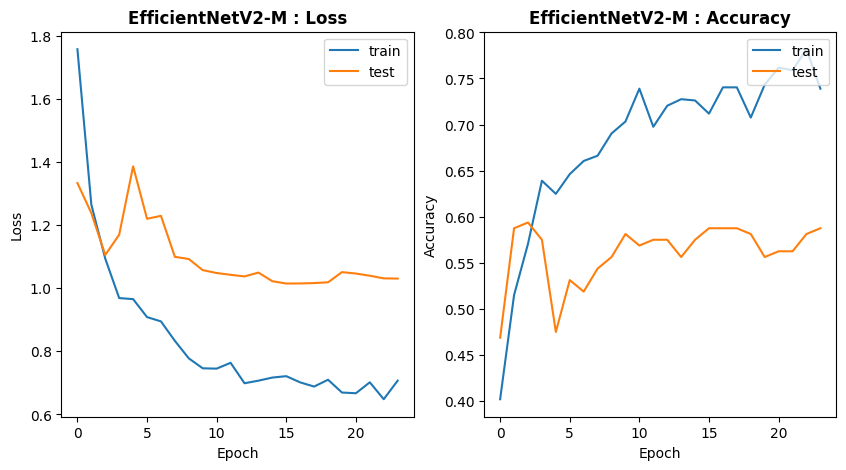

In [ ]:
plot_performance(model_name='EfficientNetV2-M',
                  accuracy=history.history['accuracy'],
                 val_accuracy=history.history['val_accuracy'],
                 loss=history.history['loss'],
                 val_loss=history.history['val_loss'])

In [ ]:
test_steps = test_generator.samples // BATCH_SIZE

test_loss, test_acc = trf_lr_efficientnet_model.evaluate(test_generator, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

5/5 [==============================] - 1s 209ms/step - loss: 1.0305 - accuracy: 0.5875

accuracy: 0.5874999761581421 loss:  1.0304505825042725


In [ ]:
predict = trf_lr_efficientnet_model.predict(test_generator, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

5/5 [==============================] - 4s 211ms/step


array([2, 1, 2, 4, 0, 3, 1, 2, 2, 2, 5, 1, 3, 0, 1, 2, 3, 5, 0, 4])

In [ ]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
'4' : 4,
'5' : 5,
'6' : 6,

}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([2, 4, 2, 4, 0, 1, 1, 2, 0, 3, 6, 1, 0, 0, 1, 2, 1, 6, 0, 2])

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.61      0.65      0.63        34
           2       0.79      0.79      0.79        29
           3       0.23      0.29      0.25        24
           4       0.57      0.50      0.53        16
           5       0.73      0.92      0.81        12
           6       0.80      0.62      0.70        13

    accuracy                           0.59       160
   macro avg       0.62      0.60      0.61       160
weighted avg       0.60      0.59      0.59       160
 



<Axes: >

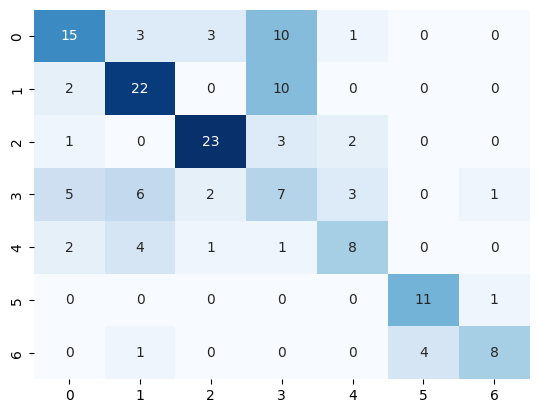

In [ ]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  # batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=False,
                  num_parallel_calls=AUTOTUNE)

Found 733 validated image filenames belonging to 7 classes.


In [ ]:
train_steps = train_generator.samples // BATCH_SIZE

y_train_pred_proba = trf_lr_efficientnet_model.predict(train_generator)
y_train_pred = np.argmax(y_train_pred_proba, axis=1)
y_train_true = train_generator.classes

23/23 [==============================] - 11s 500ms/step


In [ ]:
train_report = classification_report(y_train_true, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       157
           1       0.79      0.76      0.77       146
           2       0.72      0.73      0.72       120
           3       0.66      0.68      0.67       117
           4       0.74      0.67      0.70        78
           5       0.93      0.93      0.93        59
           6       0.88      0.95      0.91        56

    accuracy                           0.74       733
   macro avg       0.77      0.77      0.77       733
weighted avg       0.74      0.74      0.74       733

